In [2]:
import os, pandas as pd, numpy as np

In [3]:
os.chdir("E:\\Assignments_SCMA632\\Data")

In [4]:
df=pd.read_csv("NSSO68.csv",encoding="Latin-1", low_memory=False)

In [5]:
df.head()

,slno,grp,Round_Centre,FSU_number,Round,Schedule_Number,Sample,Sector,state,State_Region,...,pickle_v,sauce_jam_v,Othrprocessed_v,Beveragestotal_v,foodtotal_v,foodtotal_q,state_1,Region,fruits_df_tt_v,fv_tot
0,1,4.10E+31,1,41000,68,10,1,2,24,242,...,0.0,0.0,0.0,0.000000,1141.492400,30.942394,GUJ,2,12.000000,154.18
1,2,4.10E+31,1,41000,68,10,1,2,24,242,...,0.0,0.0,0.0,17.500000,1244.553500,29.286153,GUJ,2,333.000000,484.95
2,3,4.10E+31,1,41000,68,10,1,2,24,242,...,0.0,0.0,0.0,0.000000,1050.315400,31.527046,GUJ,2,35.000000,214.84
3,4,4.10E+31,1,41000,68,10,1,2,24,242,...,0.0,0.0,0.0,33.333333,1142.591667,27.834607,GUJ,2,168.333333,302.30
4,5,4.10E+31,1,41000,68,10,1,2,24,242,...,0.0,0.0,0.0,75.000000,945.249500,27.600713,GUJ,2,15.000000,148.00


In [6]:
AP = df[df['state_1']=="AP"]

In [7]:
AP.isnull().sum().sort_values(ascending = False)

soyabean_q             6899
soyabean_v             6899
Meals_School           6838
Meals_Employer         6794
Otherwise_possessed    6692
                       ... 
brinjal_q                 0
tamato_q                  0
onion_q                   0
potato_q                  0
fv_tot                    0
Length: 384, dtype: int64

In [8]:
df.columns

Index(['slno', 'grp', 'Round_Centre', 'FSU_number', 'Round', 'Schedule_Number',
       'Sample', 'Sector', 'state', 'State_Region',
       ...
       'pickle_v', 'sauce_jam_v', 'Othrprocessed_v', 'Beveragestotal_v',
       'foodtotal_v', 'foodtotal_q', 'state_1', 'Region', 'fruits_df_tt_v',
       'fv_tot'],
      dtype='object', length=384)

In [25]:
AP_new = AP[['state_1', 'District', 'Sector','Region','State_Region','ricetotal_q','wheattotal_q','moong_q','Milktotal_q','chicken_q','bread_q','foodtotal_q','Beveragestotal_v','Meals_At_Home']]

In [26]:
AP_new.isnull().sum().sort_values(ascending = False)

Meals_At_Home       122
state_1               0
District              0
Sector                0
Region                0
State_Region          0
ricetotal_q           0
wheattotal_q          0
moong_q               0
Milktotal_q           0
chicken_q             0
bread_q               0
foodtotal_q           0
Beveragestotal_v      0
dtype: int64

In [27]:
AP_clean = AP_new.copy()

In [28]:
AP_clean.loc[:, 'Meals_At_Home'] = AP_clean['Meals_At_Home'].fillna(AP_new['Meals_At_Home'].mean())

In [29]:
AP_clean.isnull().any()

state_1             False
District            False
Sector              False
Region              False
State_Region        False
ricetotal_q         False
wheattotal_q        False
moong_q             False
Milktotal_q         False
chicken_q           False
bread_q             False
foodtotal_q         False
Beveragestotal_v    False
Meals_At_Home       False
dtype: bool

In [17]:
# Outlier Checking

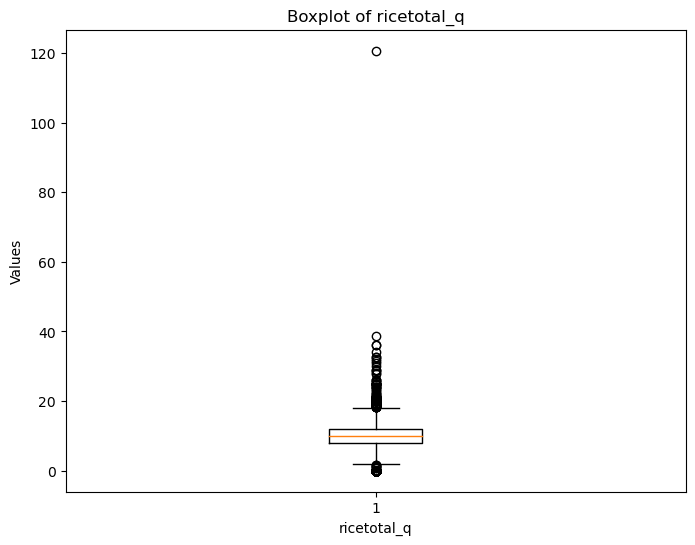

In [34]:
import matplotlib.pyplot as plt
# Assuming AP_clean is your DataFrame
plt.figure(figsize=(8, 6))
plt.boxplot(AP_clean['ricetotal_q'])
plt.xlabel('ricetotal_q')
plt.ylabel('Values')
plt.title('Boxplot of ricetotal_q')
plt.show()

In [36]:
rice1 = AP_clean['ricetotal_q'].quantile(0.25)
rice2 = AP_clean['ricetotal_q'].quantile(0.75)
iqr_rice = rice2-rice1
up_limit = rice2 + 1.5*iqr_rice
low_limit = rice1 - 1.5*iqr_rice

In [37]:
AP_clean=AP_new[(AP_new['ricetotal_q']<=up_limit)&(AP_new['ricetotal_q']>=low_limit)]

{'whiskers': [<matplotlib.lines.Line2D at 0x21a91a17850>,
 'caps': [<matplotlib.lines.Line2D at 0x21a91a18c10>,
 'boxes': [<matplotlib.lines.Line2D at 0x21a90bb5410>],
 'medians': [<matplotlib.lines.Line2D at 0x21a91a19e90>],
 'fliers': [<matplotlib.lines.Line2D at 0x21a91a18650>],
 'means': []}

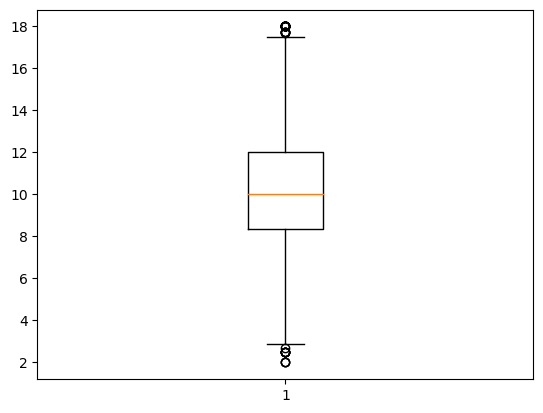

In [39]:
plt.boxplot(AP_clean['ricetotal_q'])

In [40]:
AP_clean['District'].unique()

array([ 5, 10,  9,  7,  8,  6,  4,  3,  2,  1, 23, 21, 22, 18, 17, 19, 20,
       16, 15, 14, 13, 11, 12], dtype=int64)

In [41]:
# Replace values in the 'Sector' column
AP_clean.loc[:,'Sector'] = AP_clean['Sector'].replace([1, 2], ['URBAN', 'RURAL'])

In [27]:
#total consumption

In [44]:
AP_clean.columns

Index(['state_1', 'District', 'Sector', 'Region', 'State_Region',
       'ricetotal_q', 'wheattotal_q', 'moong_q', 'Milktotal_q', 'chicken_q',
       'bread_q', 'foodtotal_q', 'Beveragestotal_v', 'Meals_At_Home'],
      dtype='object')

In [46]:
AP_clean.loc[:, 'total_consumption'] = AP_clean[['ricetotal_q', 'wheattotal_q', 'moong_q', 'Milktotal_q', 'chicken_q', 'bread_q', 'foodtotal_q', 'Beveragestotal_v']].sum(axis=1)

In [47]:
AP_clean.head()

,state_1,District,Sector,Region,State_Region,ricetotal_q,wheattotal_q,moong_q,Milktotal_q,chicken_q,bread_q,foodtotal_q,Beveragestotal_v,Meals_At_Home,total_consumption
6777,AP,5,RURAL,3,283,5.0,1.666667,0.166667,0,0.166667,0.083333,18.308732,23.337333,60.0,48.729398
6778,AP,5,RURAL,3,283,15.0,0.000000,0.000000,0,0.500000,0.000000,29.781670,10.000000,60.0,55.281670
6779,AP,5,RURAL,3,283,9.0,0.400000,0.000000,0,0.100000,0.000000,18.412530,0.000000,60.0,27.912530
6780,AP,5,RURAL,3,283,11.5,1.250000,0.062500,0,0.250000,0.125000,24.025527,0.006000,60.0,37.219027
6781,AP,5,RURAL,3,283,12.0,1.000000,0.000000,0,0.100000,0.100000,22.070518,10.000000,84.0,45.270518


In [48]:
AP_clean.groupby('Region').agg({'total_consumption':['std','mean','max','min']})

total_consumption                                  
                     std       mean         max        min
Region                                                    
1              34.296665  52.496520  515.500000   9.400250
2              28.004309  50.412912  503.804451  11.675500
3              36.461364  56.075728  469.195210   8.983412
4              21.431712  47.885858  214.789225  14.800350
5              28.297460  51.225699  464.228199  12.000000

In [49]:
AP_clean.groupby('District').agg({'total_consumption':['std','mean','max','min']})

total_consumption                                  
                       std       mean         max        min
District                                                    
1                23.845184  51.509327  205.588088   8.983412
2                24.795813  52.616025  181.761045  19.015029
3                17.103694  40.704630  178.263130  18.613035
4                21.371534  44.730328  268.745435  21.775551
5                48.198011  65.716977  397.603705  12.000000
6                34.651498  56.213359  264.988405  20.360352
7                35.428999  53.849872  469.195210  21.701005
8                21.882245  50.707352  149.781234  22.450725
9                25.999215  54.834322  214.789225  20.575365
10               15.543320  45.411785  113.501015  14.800350
11               31.212767  51.292501  290.690517  18.350243
12               28.172770  50.928521  166.081600   9.400250
13               36.700847  49.776463  515.500000  13.200085
14               33.808825  48.864203  396.982228  13.125298
15               35.853305  61.471043  241.651325  18.587800
16               39.978027  59.540085  503.804451  11.675500
17               25.060855  46.091051  216.000530  11.990102
18               14.241345  46.852630  118.850575  18.550120
19               17.647695  47.698671  151.554365  22.050655
20               36.134489  56.103714  464.228199  18.242887
21               20.129181  42.497799  137.040693  14.140320
22               18.907819  45.619045  179.676450  12.000000
23               31.685892  60.910832  205.511070  14.750110

In [50]:
total_consumption_by_districtcode=AP_clean.groupby('District')['total_consumption'].sum()

In [51]:
total_consumption_by_districtcode.sort_values(ascending=False).head(3)

District
5     32267.035919
6     22035.636681
23    20466.039522
Name: total_consumption, dtype: float64

In [52]:
AP_clean.loc[:,"District"] = AP_clean.loc[:,"District"].replace({5: "Hyderabad and Rangar", 6: "Rangareddi", 23: "Chittoor"})

In [53]:
total_consumption_by_districtname=AP_clean.groupby('District')['total_consumption'].sum()

In [54]:
total_consumption_by_districtname.sort_values(ascending=False).head(3)

District
Hyderabad and Rangar    32267.035919
Rangareddi              22035.636681
Chittoor                20466.039522
Name: total_consumption, dtype: float64

In [55]:
from statsmodels.stats import weightstats as stests

In [56]:
rural=AP_clean[AP_clean['Sector']=="RURAL"]
urban=AP_clean[AP_clean['Sector']=="URBAN"]

In [57]:
rural.head()

,state_1,District,Sector,Region,State_Region,ricetotal_q,wheattotal_q,moong_q,Milktotal_q,chicken_q,bread_q,foodtotal_q,Beveragestotal_v,Meals_At_Home,total_consumption
6777,AP,Hyderabad and Rangar,RURAL,3,283,5.0,1.666667,0.166667,0,0.166667,0.083333,18.308732,23.337333,60.0,48.729398
6778,AP,Hyderabad and Rangar,RURAL,3,283,15.0,0.000000,0.000000,0,0.500000,0.000000,29.781670,10.000000,60.0,55.281670
6779,AP,Hyderabad and Rangar,RURAL,3,283,9.0,0.400000,0.000000,0,0.100000,0.000000,18.412530,0.000000,60.0,27.912530
6780,AP,Hyderabad and Rangar,RURAL,3,283,11.5,1.250000,0.062500,0,0.250000,0.125000,24.025527,0.006000,60.0,37.219027
6781,AP,Hyderabad and Rangar,RURAL,3,283,12.0,1.000000,0.000000,0,0.100000,0.100000,22.070518,10.000000,84.0,45.270518


In [58]:
urban.head()

,state_1,District,Sector,Region,State_Region,ricetotal_q,wheattotal_q,moong_q,Milktotal_q,chicken_q,bread_q,foodtotal_q,Beveragestotal_v,Meals_At_Home,total_consumption
62733,AP,16,URBAN,2,282,10.0,2.000000,0.000000,0,0.000000,0.0,38.850555,0.000,60.0,50.850555
62734,AP,16,URBAN,2,282,10.0,0.333333,0.166667,0,0.333333,0.0,30.317625,76.678,60.0,117.828958
62735,AP,16,URBAN,2,282,11.5,0.500000,0.250000,0,0.500000,0.0,29.801230,49.000,60.0,91.551230
62736,AP,16,URBAN,2,282,10.0,0.000000,0.200000,0,0.200000,0.0,24.600460,70.000,60.0,105.000460
62737,AP,16,URBAN,2,282,10.0,0.500000,0.000000,0,0.250000,0.0,31.025635,50.000,60.0,91.775635


In [59]:
cons_rural=rural['total_consumption']
cons_urban=urban['total_consumption']

In [60]:
z_statistic, p_value = stests.ztest(cons_rural, cons_urban)
# Print the z-score and p-value
print("Z-Score:", z_statistic)
print("P-Value:", p_value)

Z-Score: 12.52569222339867
P-Value: 5.4017986377956026e-36
